In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [36]:
data=pd.read_csv("Add_sales_data_2018.csv")

In [37]:
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


# relationship between the amount spent for advertising through five different companies and profit generated¶

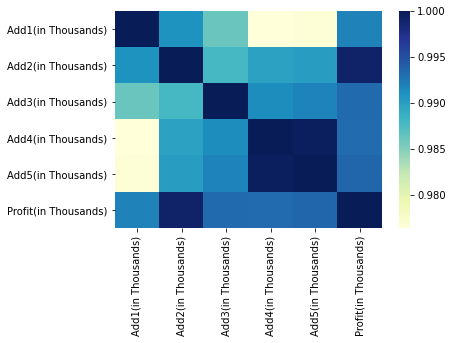

In [38]:
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

# regression model

In [39]:
X = data.iloc[:, :-1]
y = data.iloc[:, 1]

In [40]:
X = data.drop('Date',axis=1)

In [41]:
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
lasso= Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [44]:
svr= SVR(C=8,epsilon=0.2,gamma=0.5)
svr.fit(X_train,y_train)

SVR(C=8, epsilon=0.2, gamma=0.5)

prediction

lasso

In [45]:
y_pred_lasso=np.round(np.clip(lasso.predict(X_test),1,10)).astype(int)
np.round(1-mean_squared_error(y_test,y_pred_lasso)/y_test.std(),2)

-2417.83

svr

In [46]:
y_pred_svr=np.round(np.clip(svr.predict(X_test),1,10)).astype(int)
np.round(1-mean_squared_error(y_test,y_pred_svr)/y_test.std(),2)

-2417.83

# Predict the profit generated by the company, if they wish to spend the following amount for advertisement.


In [47]:
df=[290,312,309,298,320]

In [48]:
X = data1.iloc[:, :-1]
y = data1.iloc[:, 1]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predict=lr_model.predict(X_test)
print(lr_predict)

[555.3  628.7  547.95 536.5  626.95 618.8  593.   580.85 608.2  554.
 551.25 590.4  569.9  582.15 559.   619.3  576.   552.   551.85 583.9
 583.25 605.65 577.75 623.25 640.75 594.7  589.05 600.   591.8  574.7
 631.65 619.7  587.65 622.7  567.5  537.4  629.8  575.65 555.55 586.65
 561.65 546.6  575.55 576.65 586.45 588.35 551.3  578.7  589.   625.5
 548.75 574.2  596.4  585.25 588.85 603.5  593.   605.95 587.9  549.3
 558.9  578.3  552.45 588.2  577.75 602.5  581.7  537.   586.2 ]
